# Intro to Google Colab
As I started learning deep learning, I got introduced with the google colab. in the first click, it seems natural, as i am used to write code on my machines and never thught of leaving my beloved VSCode and its user friendly enviroment. however, I learned that in google colab one just need a supported browser and good internet connection, rest is taken care by goole colab. I can now access GPUs, which previously i couldnt, as i dont have one in my local system.
* runs completly on cloud
* multiple users can work at the same time


## why colab?
As a student, and early practictioner, i can access deep setup for my learning with about 12Gb Ram, and GPU availability. The only down side is a limit of 12 hrs!! i guess its enough as an ealry practictioner.

besides it comes with pre-installed usually popular lib and deep learning frameworks.

In [2]:
# important lib
import numpy as np
import tensorflow as tf
import keras as ke
import cv2
import matplotlib.pyplot as plt

print(cv2.__version__)
print(ke.__version__)

4.8.0
2.13.1


What if I want to add a lib, which is not there in the colab?

its simple: just type `!pip install opencv-contrib-python` and its going to install it for us. besides we can also use command line from here.. just need to write `%%bash`, and it act as a command line interface, and check our usage of resources.

In [4]:
%%bash
ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi    # link nvidia smi to some convinient location
pip install gputil                                # gives us info about the usage of nvidia gpus
pip install psutil                                # gives us info about cpus & memory usage
pip install humanize                              # allow us to display nos in a human readible format

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=1ecb864d0e95595a09305245f457bb6138f06232e6249a995f29ca28e6468318
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil


In [8]:
import psutil
import humanize
import os
import GPUtil as GPU

In [9]:
# checking how much ram and gpu memory available to us
GPUs = GPU.getGPUs()
print(len(GPUs))          # we get 1 gpu at our disposal

1


In [12]:
# Info about System, process & GPU memory
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available),
          " | Proc size: " + humanize.naturalsize(process.memory_info().rss))

    GPUs = GPU.getGPUs()
    # Only one GPU on Colab and it's not guaranteed
    gpu = GPUs[0]
    print('''GPU RAM | Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB'''.format(
        gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm()


Gen RAM Free: 12.3 GB  | Proc size: 623.8 MB
GPU RAM | Free: 15101MB | Used: 0MB | Util   0% | Total 15360MB


In [13]:
# check disk space:
!df -h


Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   27G   52G  34% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.1G  885M  55% /usr/sbin/docker-init
tmpfs           6.4G  4.2M  6.4G   1% /var/colab
/dev/sda1        50G   29G   22G  58% /opt/bin/.nvidia
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


## how to upload a file from local machine?
We create a button in the notebook, which help us to get the files from local machine.


In [15]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print("User uploaded file '{name}' with length {length} bytes".format(name=fn, length=len(uploaded[fn])))


Saving prompt engineering (2).jpg to prompt engineering (2).jpg
User uploaded file 'prompt engineering (2).jpg' with length 43912 bytes


In [16]:
# check if the file exist
!ls

'prompt engineering (2).jpg'   sample_data


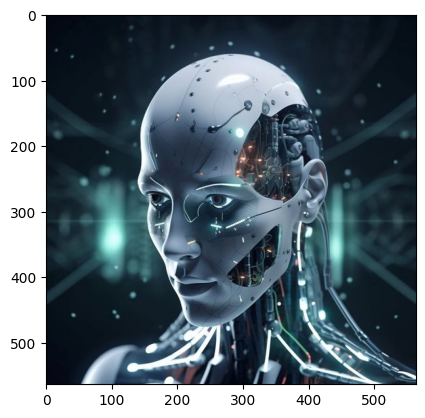

In [18]:
# read the image

import cv2
im = cv2.imread("prompt engineering (2).jpg")
imRGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(imRGB)

## Cloning Github Repo in Google Colab
it is possible to clone the github repo in google colab and add to the local directory. Here I am going to clone my own repo.

In [19]:
!git clone https://github.com/numustafa/Computer-Vision-1.git

Cloning into 'Computer-Vision-1'...
remote: Enumerating objects: 278, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 278 (delta 11), reused 35 (delta 9), pack-reused 235
Receiving objects: 100% (278/278), 48.71 MiB | 30.27 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [20]:
# checking the local directory
!ls

 Computer-Vision-1  'prompt engineering (2).jpg'   sample_data


In [22]:
# change the directory to Computer-Vision-1
import os
os.chdir("./Computer-Vision-1/")
!ls

'Articles stuff'   ex_2       Intro+python   week2_python
 Assignment1	   ex_3       __pycache__    week3_python
 ex1_w1.ipynb	   ex_3.zip   week1_python


## conclusion
How to open a new notebook and a notebook from GitHub
How to save a notebook to Drive or Github
How to install new libraries ( python or system )
How to upload data on Colab
How to clone any github repo and use it on Colab
In the next unit we will discuss how to use Caffe models for Inference and also discuss how to train Caffe Models on Colab.
